## 7.1

In [1]:
#필요한 라이브러리 받아주기
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

In [2]:
#사용할 데이터 받기(Mnist Data)
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

In [3]:
#크기 확인(이후에 있을 딥러닝 크기를 위해)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


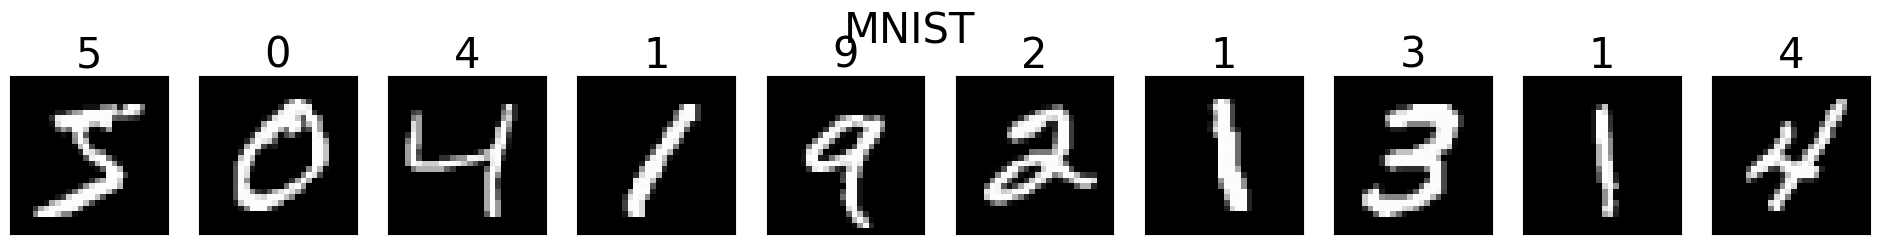

In [4]:
#Matplotlib 라이브러리로 Mnist 이미지 보여주기
plt.figure(figsize=(24,3))
plt.suptitle('MNIST', fontsize = 30)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    #눈금을 표시하는 함수(여기서는 눈금 표시 X)
    plt.xticks([]); plt.yticks([])
    plt.title(str(y_train[i]), fontsize = 30)

In [5]:
#사용할 데이터 받기(cifar10 data)
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#class_name을 추가하여 사진이 무엇을 보여주는지 알려주는 코드
class_names = ['airplane', 'car', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


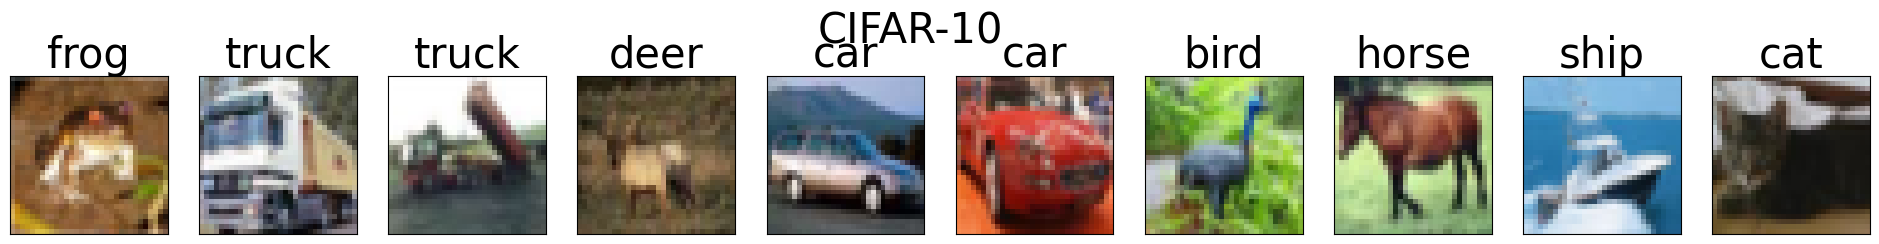

In [6]:
#Matplotlib 라이브러리로 cifar-10 이미지 보여주기
plt.figure(figsize = (24,3))
plt.suptitle('CIFAR-10', fontsize = 30)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[y_train[i,0]], fontsize = 30)

## 7.2

In [7]:
#라이브러리 불러오기 + SGD 옵티마이저 불러오기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [8]:
#Mnist Data를 불러오되, 데이터가 실수 연산이 가능하도록 변환하는 과정
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
#2차원 구조 맵을 1차원으로 펼치는 과정
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
#Sequential함수로 층을 쌓기
mlp = Sequential()
mlp.add(Dense(units = 512, activation = 'tanh', input_shape = (784,)))
mlp.add(Dense(units = 10, activation = 'softmax'))

In [10]:
#옵티마이저는 SGD를 이용하여 진행.
mlp.compile(loss = 'MSE', optimizer = SGD(learning_rate = 0.01), metrics = ['accuracy'])
mlp.fit(x_train, y_train, batch_size = 128, epochs=50, validation_data=(x_test, y_test), verbose = 2)

res = mlp.evaluate(x_test, y_test, verbose = 0)
print('정확률=', res[1]*100)

Epoch 1/50


469/469 - 3s - loss: 0.0889 - accuracy: 0.1792 - val_loss: 0.0863 - val_accuracy: 0.2729 - 3s/epoch - 6ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0827 - accuracy: 0.3712 - val_loss: 0.0789 - val_accuracy: 0.4630 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0747 - accuracy: 0.5044 - val_loss: 0.0705 - val_accuracy: 0.5447 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0669 - accuracy: 0.5698 - val_loss: 0.0633 - val_accuracy: 0.6020 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0605 - accuracy: 0.6237 - val_loss: 0.0573 - val_accuracy: 0.6546 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0551 - accuracy: 0.6694 - val_loss: 0.0522 - val_accuracy: 0.6960 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0506 - accuracy: 0.7033 - val_loss: 0.0480 - val_accuracy: 0.7254 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0469 - accuracy: 0.7275 - val_loss: 0.0445 - val_accuracy: 0.7492 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2

## 7.3

In [11]:
#라이브러리 불러오기 + Adam 옵티마이저
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [12]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [13]:
mlp = Sequential()
mlp.add(Dense(units = 512, activation = 'tanh', input_shape =(784,)))
mlp.add(Dense(units = 10, activation = 'softmax'))

In [14]:
#옵티마이저를 SGD에서 Adam으로 변경
mlp.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

Epoch 1/50
469/469 - 3s - loss: 0.0148 - accuracy: 0.9013 - val_loss: 0.0101 - val_accuracy: 0.9348 - 3s/epoch - 7ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0089 - accuracy: 0.9421 - val_loss: 0.0082 - val_accuracy: 0.9462 - 3s/epoch - 6ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0066 - accuracy: 0.9576 - val_loss: 0.0059 - val_accuracy: 0.9607 - 3s/epoch - 6ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0051 - accuracy: 0.9683 - val_loss: 0.0054 - val_accuracy: 0.9655 - 3s/epoch - 6ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0041 - accuracy: 0.9747 - val_loss: 0.0049 - val_accuracy: 0.9677 - 3s/epoch - 5ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0034 - accuracy: 0.9799 - val_loss: 0.0042 - val_accuracy: 0.9722 - 3s/epoch - 5ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0029 - accuracy: 0.9832 - val_loss: 0.0038 - val_accuracy: 0.9757 - 3s/epoch - 6ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0023 - accuracy: 0.9864 - val_loss: 0.0035 - val_accuracy: 0.9769 - 3s/epoch - 6ms/step
Epoch 9/50
469/469 - 3s 

## 7.4

In [15]:
#성능 비교를 위한 시각화
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [16]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [17]:
mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
#객체에 저장하여 그래프에 그릴 수 있도록
hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

Epoch 1/50
469/469 - 2s - loss: 0.0882 - accuracy: 0.1675 - val_loss: 0.0847 - val_accuracy: 0.2938 - 2s/epoch - 5ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0814 - accuracy: 0.3811 - val_loss: 0.0774 - val_accuracy: 0.4648 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0742 - accuracy: 0.5080 - val_loss: 0.0700 - val_accuracy: 0.5636 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0671 - accuracy: 0.5952 - val_loss: 0.0629 - val_accuracy: 0.6423 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0604 - accuracy: 0.6595 - val_loss: 0.0565 - val_accuracy: 0.6961 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0546 - accuracy: 0.7009 - val_loss: 0.0512 - val_accuracy: 0.7303 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0499 - accuracy: 0.7322 - val_loss: 0.0469 - val_accuracy: 0.7582 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0460 - accuracy: 0.7544 - val_loss: 0.0433 - val_accuracy: 0.7796 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2s 

In [18]:
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
#객체에 저장하여 그래프에 그릴 수 있도록
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('Adam 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

Epoch 1/50
469/469 - 3s - loss: 0.0153 - accuracy: 0.8987 - val_loss: 0.0100 - val_accuracy: 0.9359 - 3s/epoch - 7ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0090 - accuracy: 0.9415 - val_loss: 0.0080 - val_accuracy: 0.9489 - 3s/epoch - 5ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0065 - accuracy: 0.9586 - val_loss: 0.0062 - val_accuracy: 0.9609 - 3s/epoch - 5ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0052 - accuracy: 0.9677 - val_loss: 0.0053 - val_accuracy: 0.9649 - 3s/epoch - 5ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0042 - accuracy: 0.9740 - val_loss: 0.0049 - val_accuracy: 0.9672 - 3s/epoch - 5ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0034 - accuracy: 0.9793 - val_loss: 0.0041 - val_accuracy: 0.9742 - 3s/epoch - 5ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0029 - accuracy: 0.9828 - val_loss: 0.0041 - val_accuracy: 0.9733 - 3s/epoch - 5ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0024 - accuracy: 0.9859 - val_loss: 0.0037 - val_accuracy: 0.9761 - 3s/epoch - 5ms/step
Epoch 9/50
469/469 - 3s 

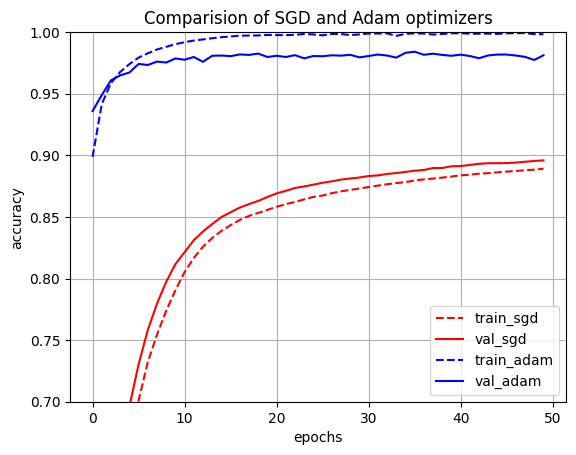

In [19]:
import matplotlib.pyplot as plt
#history : 훈련 과정에서 정확도와 같은 지표, 손실값 기록. -> 그래프로 보여준다는 것
plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparision of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()

## 7.5

In [20]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [21]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [22]:
#층을 더 쌓아보기
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation = 'relu', input_shape = (784,)))
dmlp.add(Dense(units=512, activation = 'relu'))
dmlp.add(Dense(units=512, activation = 'relu'))
dmlp.add(Dense(units=10, activation = 'softmax'))

In [23]:
dmlp.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate =0.0001), metrics=['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_data = (x_test, y_test), verbose = 2)
print('정확률 =', dmlp.evaluate(x_test, y_test, verbose = 0)[1]*100)
#결과값을 저장
deep_model = dmlp.save('dmlp_trained.h5')

Epoch 1/50
469/469 - 9s - loss: 0.4039 - accuracy: 0.8964 - val_loss: 0.1778 - val_accuracy: 0.9480 - 9s/epoch - 20ms/step
Epoch 2/50
469/469 - 8s - loss: 0.1430 - accuracy: 0.9588 - val_loss: 0.1196 - val_accuracy: 0.9650 - 8s/epoch - 17ms/step
Epoch 3/50
469/469 - 8s - loss: 0.0953 - accuracy: 0.9726 - val_loss: 0.0900 - val_accuracy: 0.9724 - 8s/epoch - 17ms/step
Epoch 4/50
469/469 - 8s - loss: 0.0698 - accuracy: 0.9797 - val_loss: 0.0848 - val_accuracy: 0.9737 - 8s/epoch - 18ms/step
Epoch 5/50
469/469 - 8s - loss: 0.0527 - accuracy: 0.9851 - val_loss: 0.0726 - val_accuracy: 0.9776 - 8s/epoch - 18ms/step
Epoch 6/50
469/469 - 8s - loss: 0.0395 - accuracy: 0.9890 - val_loss: 0.0714 - val_accuracy: 0.9788 - 8s/epoch - 17ms/step
Epoch 7/50
469/469 - 8s - loss: 0.0299 - accuracy: 0.9916 - val_loss: 0.0625 - val_accuracy: 0.9808 - 8s/epoch - 17ms/step
Epoch 8/50
469/469 - 8s - loss: 0.0244 - accuracy: 0.9930 - val_loss: 0.0666 - val_accuracy: 0.9800 - 8s/epoch - 18ms/step
Epoch 9/50
469/4

C:\Users\tnv59\AppData\Local\anaconda3\envs\open_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 모델 저장하기

In [25]:
!pip install joblib

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


In [26]:
from joblib import dump
from joblib import load

In [27]:
dump(deep_model, 'C:/Users/tnv59/open_env/DT.joblib')

['C:/Users/tnv59/open_env/DT.joblib']

In [29]:
deep = load('C:/Users/tnv59/open_env/DT.joblib')
deep

## 7.6

Epoch 1/50
391/391 - 17s - loss: 1.8262 - accuracy: 0.3471 - val_loss: 1.7057 - val_accuracy: 0.3804 - 17s/epoch - 44ms/step
Epoch 2/50
391/391 - 16s - loss: 1.6263 - accuracy: 0.4217 - val_loss: 1.5734 - val_accuracy: 0.4457 - 16s/epoch - 40ms/step
Epoch 3/50
391/391 - 16s - loss: 1.5359 - accuracy: 0.4565 - val_loss: 1.5140 - val_accuracy: 0.4625 - 16s/epoch - 41ms/step
Epoch 4/50
391/391 - 16s - loss: 1.4691 - accuracy: 0.4791 - val_loss: 1.4954 - val_accuracy: 0.4656 - 16s/epoch - 40ms/step
Epoch 5/50
391/391 - 16s - loss: 1.4200 - accuracy: 0.4987 - val_loss: 1.4645 - val_accuracy: 0.4716 - 16s/epoch - 40ms/step
Epoch 6/50
391/391 - 15s - loss: 1.3732 - accuracy: 0.5139 - val_loss: 1.4110 - val_accuracy: 0.4964 - 15s/epoch - 39ms/step
Epoch 7/50
391/391 - 16s - loss: 1.3315 - accuracy: 0.5304 - val_loss: 1.4116 - val_accuracy: 0.4902 - 16s/epoch - 40ms/step
Epoch 8/50
391/391 - 16s - loss: 1.2960 - accuracy: 0.5435 - val_loss: 1.3790 - val_accuracy: 0.5128 - 16s/epoch - 40ms/step


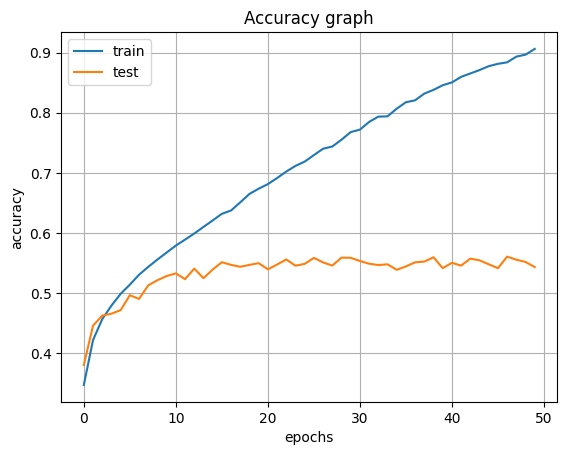

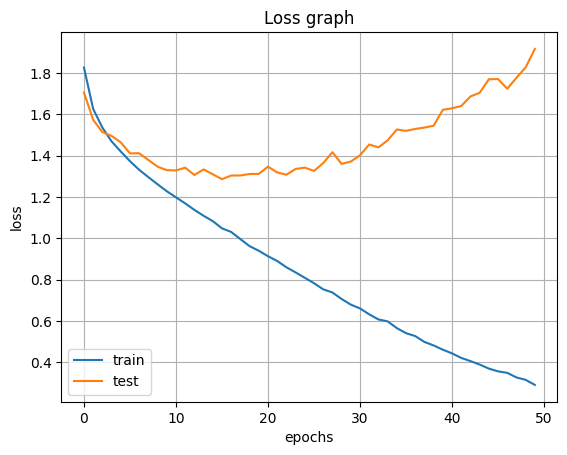

In [31]:
#깊은 다층 퍼셉트론으로 cifar-10 인식하기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

## 7.7

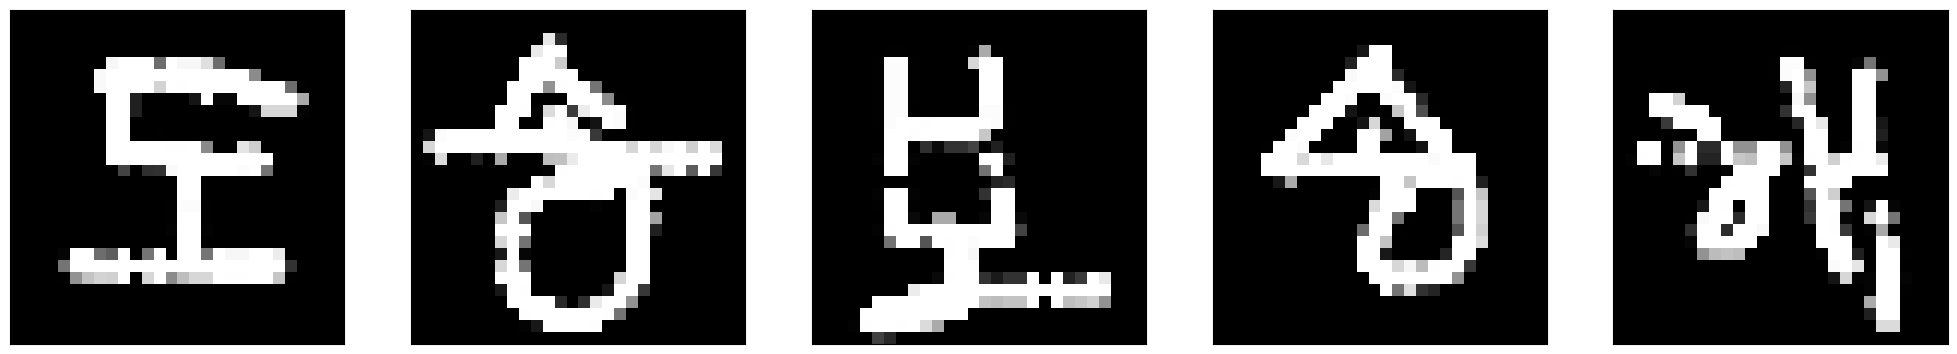

1/1 [==============================] - 0s 27ms/step


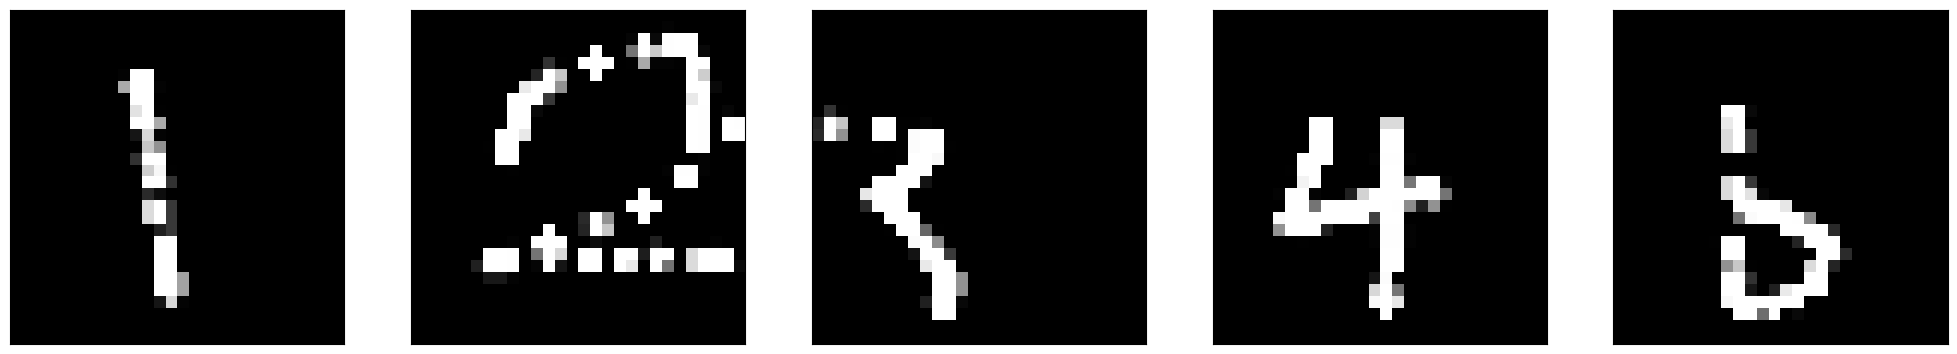

In [32]:
#우편번호 인식기
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
import winsound
#저장한 모델 불러오기
model=tf.keras.models.load_model('dmlp_trained.h5')

def reset():
    global img
       
    img=np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals():
    numerals=[]
    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)  
    numerals=np.array(numerals)
    return numerals

def show():
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
def recognition():
    numerals=grab_numerals()
    numerals=numerals.reshape(5,784)
    numerals=numerals.astype(np.float32)/255.0
    res=model.predict(numerals) # 신경망 모델로 예측
    class_id=np.argmax(res,axis=1)
    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    winsound.Beep(1000,500)    
        
BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1) 
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing',writing)

while(True):
    cv.imshow('Writing',img)
    key=cv.waitKey(1)
    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()        
    elif key==ord('r'):
        recognition()
    elif key==ord('q'):
        break
    
cv.destroyAllWindows()